In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib as mpl
from matplotlib import pyplot as plt
import functions as fn
import box
import halo
#import my_rc_params

In [2]:
plt.style.use(str(fn.HERE_PATH/'plot.mplstyle'))
print(mpl.rcParams['figure.figsize'])

[6.0, 6.0]


In [3]:
z = 2
x_bins = np.logspace(-2, 0, 21)
m_bins = np.logspace(10.5, 13.2, 11)
k = np.logspace(-1, 2, 30)
#bin_no = 6
model = 'ModM2E-4P5'

In [4]:
x = np.sqrt(x_bins[:-1]*x_bins[1:])
m = np.sqrt(m_bins[:-1]*m_bins[1:])
log_m = np.log10(m)

In [5]:
box = box.Box(fn.BOX_PATH, fn.SHOT[z])

In [6]:
df = pd.read_csv(fn.HERE_PATH/'Density_Profiles'/f'box_z{z}.csv')
halo_mass = np.array(df.iloc[:,1])
print(f'Read in {halo_mass.shape[0]} halos')
halo_density = np.array(df.iloc[:, 2:-1]) * 1e9
halo_r200c = np.array(df.iloc[:,-1]) * 1e-3
pos = np.array([0,0,0])
halos = [halo.Halo(pos, r200c) for r200c in halo_r200c]
for i, halo in enumerate(halos):
    halo.mass = halo_mass[i]
    halo.density = halo_density[i,:]

Read in 6218 halos


In [7]:
avg_halos, no_halos = fn.get_mass_avg_density(halos, m_bins)
for i, n in enumerate(no_halos):
    print(f'{n} in 10^{log_m[i]}')

2619.0 in 10^10.635
1452.0 in 10^10.905
710.0 in 10^11.175
402.0 in 10^11.445
192.0 in 10^11.715
90.0 in 10^11.985
35.0 in 10^12.254999999999999
17.0 in 10^12.525
8.0 in 10^12.795
3.0 in 10^13.065


In [8]:
df = pd.read_csv(fn.HERE_PATH/'Power_Spectra'/f'box_z{z}.csv')
p_1h = np.array(df.iloc[:,1])

In [ ]:
for bin_no in range(0,10):
    print('-------------------')
    print(f'Bin no {bin_no}')
    pivot_halos = np.array([])
    pivot_p_1h = np.array([])
    for i, x_pivot in enumerate(x[1:-1]):
        print(f'Pivot {i+1}')
        pivot_halos = np.append(pivot_halos, copy.deepcopy(avg_halos[bin_no]))
        pivot_halos[-1].pivot(x, x_pivot)
        model_halos = avg_halos.copy()
        model_halos[bin_no] = pivot_halos[-1]

        [halo.get_u(x,k) for halo in model_halos]

        pivot_p_1h = np.append(pivot_p_1h, fn.get_power(box, model_halos, k, m_bins, z, no_halos))
        pivot_p_1h = np.reshape(pivot_p_1h, [i+1, k.shape[0]])
        
        with open(fn.HERE_PATH/'Density_Profiles'/f'Pivot_z{z}_b{bin_no}_x{round(np.log10(x_pivot),2)}.csv', 'w') as f:
            header = 'rho\n'
            f.write(header)
            np.savetxt(f, pivot_halos[-1].density, delimiter=',')

        with open(fn.HERE_PATH/'Power_Spectra'/f'pivot_z{z}_b{bin_no}_x{round(np.log10(x_pivot),2)}.csv', 'w') as f:
            header = 'P_1h\n'
            f.write(header)
            np.savetxt(f, pivot_p_1h[i,:], delimiter=',')
   


---------------------
Bin no: 0


/tmp/ipykernel_23838/3000292971.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 18)
/tmp/ipykernel_23838/3000292971.py:21: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2[0].loglog()
/tmp/ipykernel_23838/3000292971.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fg2.colorbar(cax, ticks=c[::2], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)
/tmp/ipykernel_23838/3000292971.py:31: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x


---------------------
Bin no: 1


/tmp/ipykernel_23838/3000292971.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 18)
/tmp/ipykernel_23838/3000292971.py:21: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2[0].loglog()
/tmp/ipykernel_23838/3000292971.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fg2.colorbar(cax, ticks=c[::2], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)
/tmp/ipykernel_23838/3000292971.py:31: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x


---------------------
Bin no: 2


/tmp/ipykernel_23838/3000292971.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 18)
/tmp/ipykernel_23838/3000292971.py:21: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2[0].loglog()
/tmp/ipykernel_23838/3000292971.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fg2.colorbar(cax, ticks=c[::2], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)
/tmp/ipykernel_23838/3000292971.py:31: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x


---------------------
Bin no: 3


/tmp/ipykernel_23838/3000292971.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 18)
/tmp/ipykernel_23838/3000292971.py:21: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2[0].loglog()
/tmp/ipykernel_23838/3000292971.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fg2.colorbar(cax, ticks=c[::2], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)
/tmp/ipykernel_23838/3000292971.py:31: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x


---------------------
Bin no: 4


/tmp/ipykernel_23838/3000292971.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 18)
/tmp/ipykernel_23838/3000292971.py:21: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2[0].loglog()
/tmp/ipykernel_23838/3000292971.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fg2.colorbar(cax, ticks=c[::2], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)
/tmp/ipykernel_23838/3000292971.py:31: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x


---------------------
Bin no: 5


/tmp/ipykernel_23838/3000292971.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 18)
/tmp/ipykernel_23838/3000292971.py:21: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2[0].loglog()
/tmp/ipykernel_23838/3000292971.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fg2.colorbar(cax, ticks=c[::2], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)
/tmp/ipykernel_23838/3000292971.py:31: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x


---------------------
Bin no: 6


/tmp/ipykernel_23838/3000292971.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 18)
/tmp/ipykernel_23838/3000292971.py:21: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2[0].loglog()
/tmp/ipykernel_23838/3000292971.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fg2.colorbar(cax, ticks=c[::2], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)
/tmp/ipykernel_23838/3000292971.py:31: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x


---------------------
Bin no: 7


/tmp/ipykernel_23838/3000292971.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 18)
/tmp/ipykernel_23838/3000292971.py:21: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2[0].loglog()
/tmp/ipykernel_23838/3000292971.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fg2.colorbar(cax, ticks=c[::2], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)
/tmp/ipykernel_23838/3000292971.py:31: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x


---------------------
Bin no: 8


/tmp/ipykernel_23838/3000292971.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 18)
/tmp/ipykernel_23838/3000292971.py:21: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2[0].loglog()
/tmp/ipykernel_23838/3000292971.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fg2.colorbar(cax, ticks=c[::2], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)
/tmp/ipykernel_23838/3000292971.py:31: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x


---------------------
Bin no: 9


/tmp/ipykernel_23838/3000292971.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 18)
/tmp/ipykernel_23838/3000292971.py:21: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2[0].loglog()
/tmp/ipykernel_23838/3000292971.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fg2.colorbar(cax, ticks=c[::2], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)
/tmp/ipykernel_23838/3000292971.py:31: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x
/tmp/ipykernel_23838/30

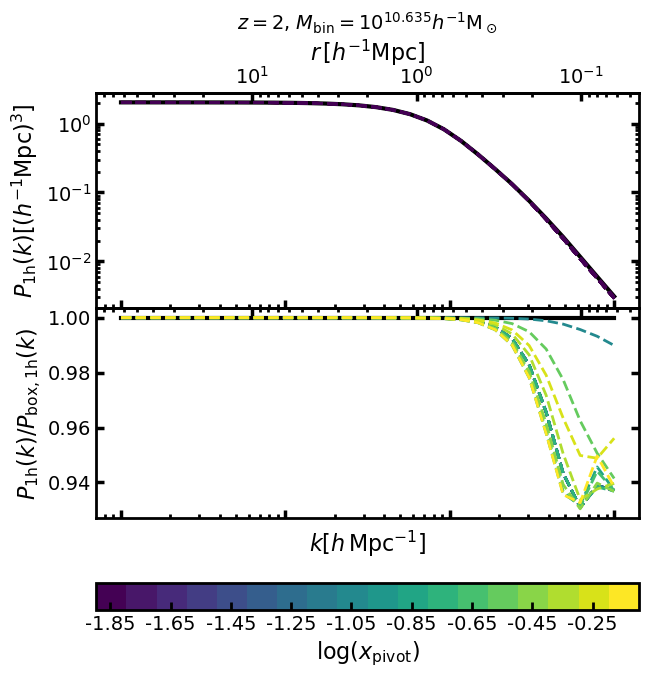

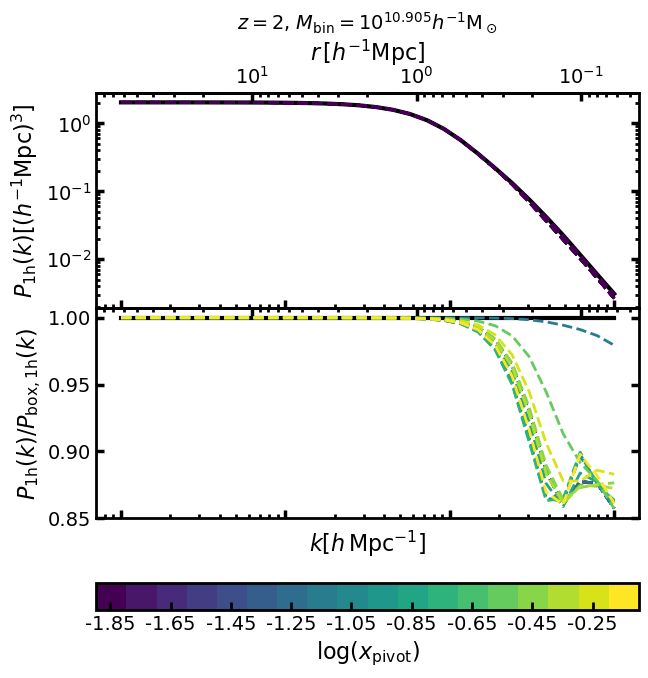

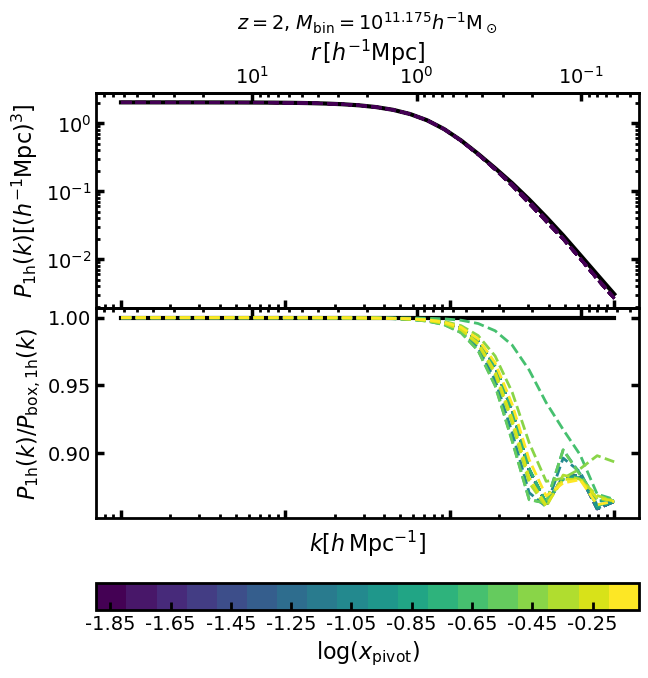

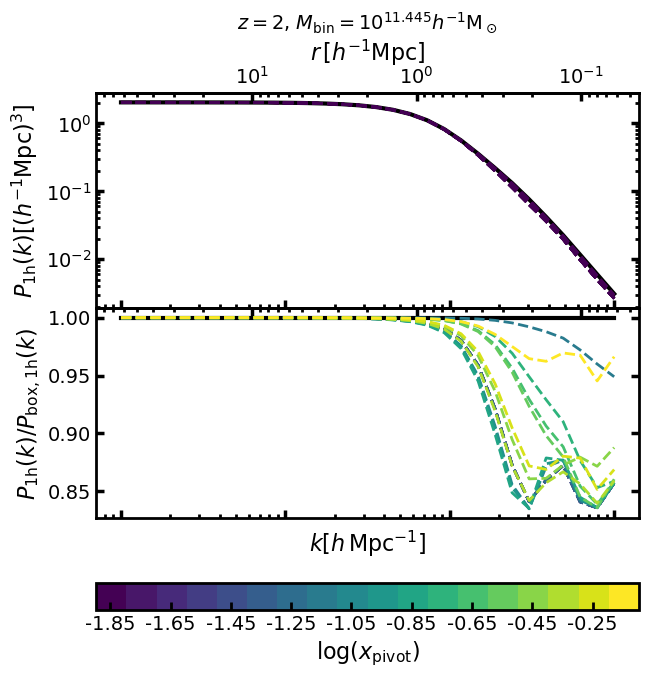

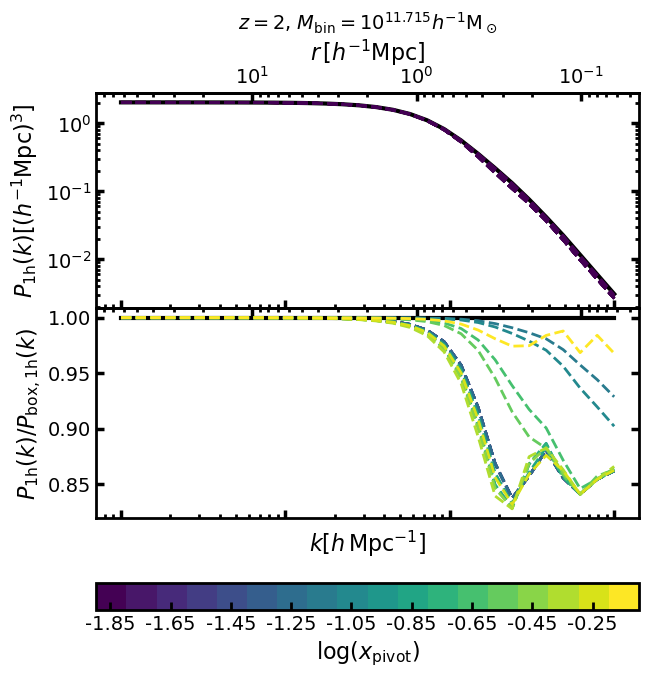

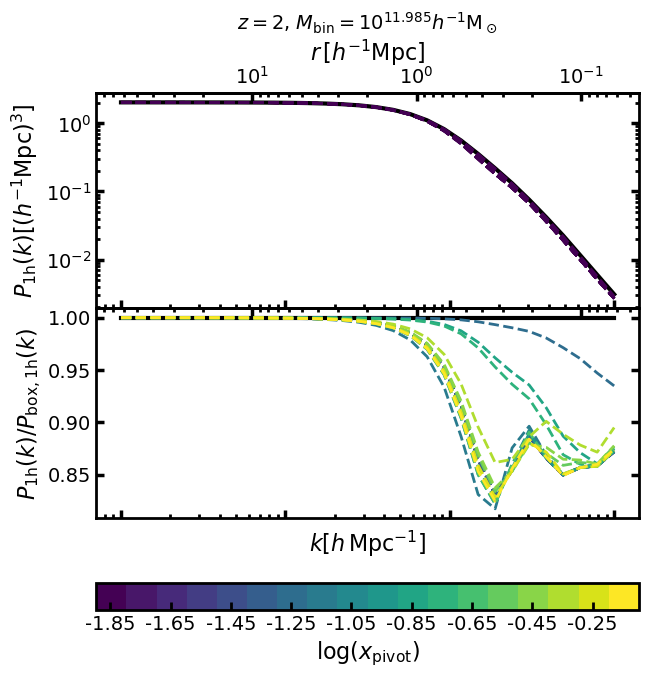

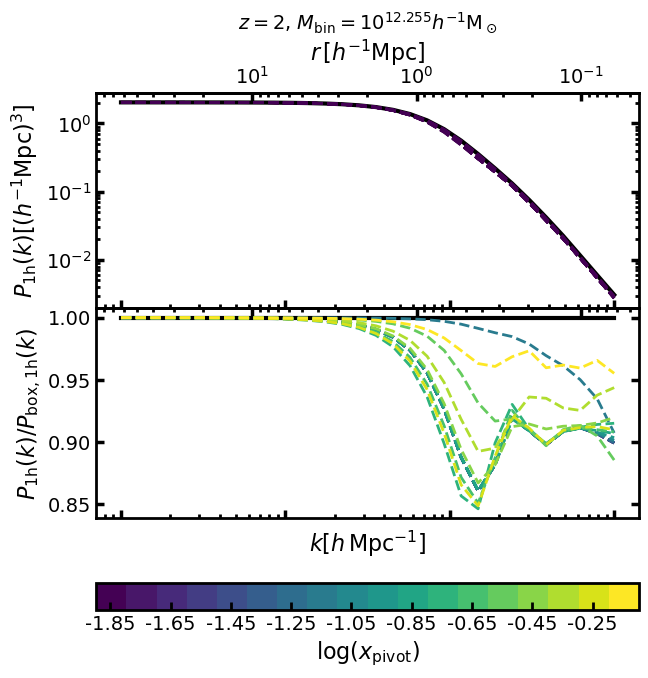

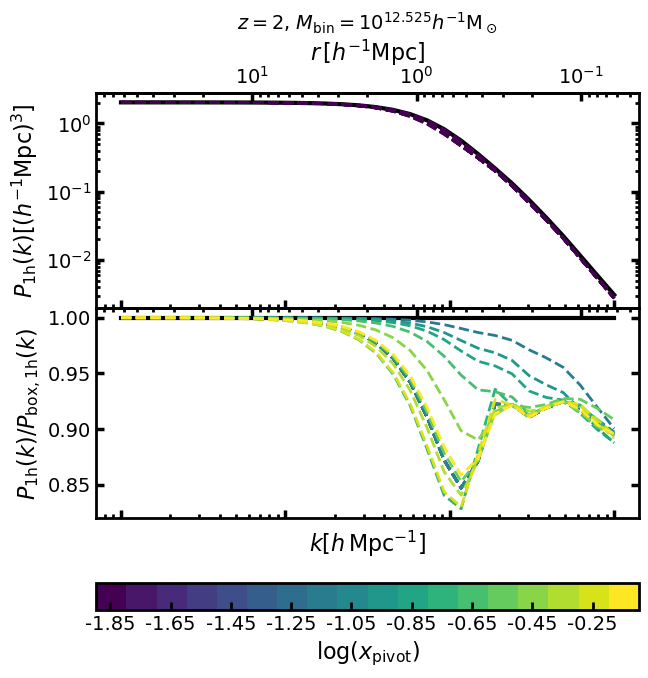

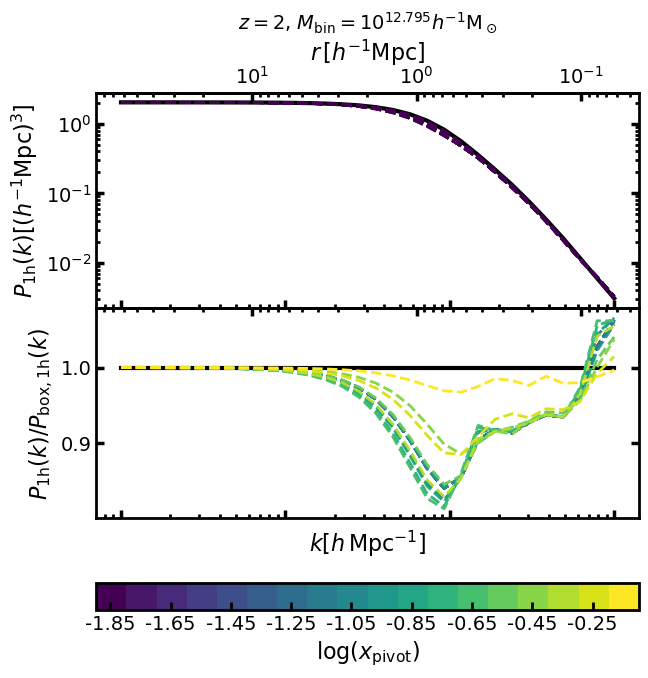

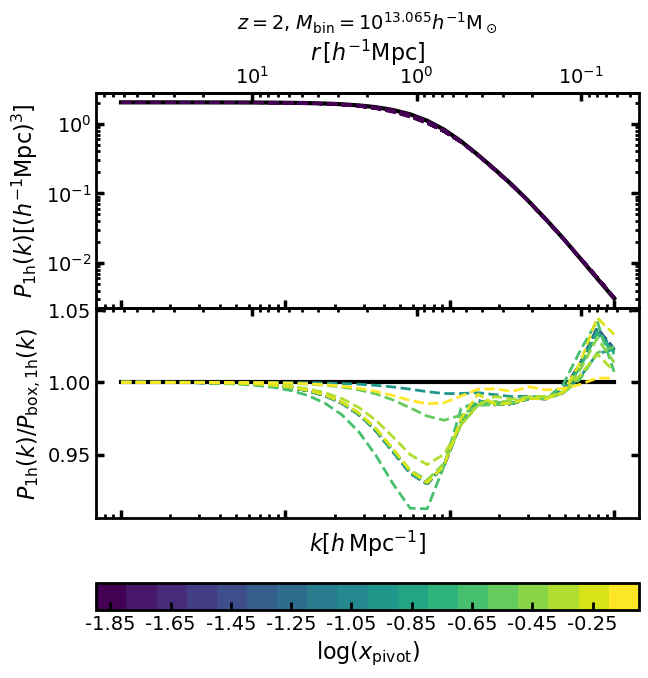

In [10]:
for bin_no in range(0, 10):
    print('---------------------')
    print(f'Bin no: {bin_no}')
    #fg, ax = plt.subplots(2, gridspec_kw={'height_ratios':[2,3]})
    #fg.subplots_a djust(hspace=0)
    

   # ax[0].loglog()
    #ax[1].loglog()
    #ax[0].set_ylabel(r'$\rho(r)[10^{10}\mathrm{M}_\odot(\mathrm{Mpc}/h)^{-3}]$')
    #ax[1].set_xlabel(r'$r/r_{200}$')
    #ax[1].set_ylabel(r'$\rho(r)/\langle\rho_\mathrm{box}\rangle(r)$')
    #ax[0].set_title(f'$M=10^{{{round(log_m[bin_no],1)}}}\mathrm{{M}}_\odot/h$, z={z}')

    fg2, ax2 = plt.subplots(2, figsize=(7, 7), gridspec_kw={'height_ratios':[2,3]})
    fg2.subplots_adjust(hspace=0)
    cmap = mpl.cm.get_cmap('viridis', 18)
    c=np.round(np.log10(x[1:-1]),2)
    cax = ax2[0].scatter(c,c,c=c,cmap=cmap)
    ax2[0].cla()
    ax2[0].loglog()
    ax2[1].semilogx()
    ax2[0].set_ylabel(r'$P_\mathrm{1h}(k)[(h^{-1}\mathrm{Mpc})^{3}]$')
    ax2[1].set_xlabel(r'$k[h\,\mathrm{Mpc}^{-1}]$')
    ax2[1].set_ylabel(r'$P_\mathrm{1h}(k)/P_\mathrm{box,1h}(k)$')
    ax2[0].set_title(f'$z = {z}$, $M_\mathrm{{bin}} = 10^{{{round(log_m[bin_no],3)}}} h^{{-1}} \mathrm{{M}}_\odot$')
    ax2[1].set_xticklabels([])
    ax2[0].tick_params(which='both', top=False)
    ax2[1].tick_params(which='both', top=False)

    f = lambda x: 2*np.pi/x

    Ax2 = ax2[0].secondary_xaxis('top', functions=(f,f))
    Ax2.set_xlabel(r'$r \, [h^{-1}\mathrm{Mpc}]$')

    Ax3 = ax2[1].secondary_xaxis('top', functions=(f,f))
    Ax3.set_xticklabels([])
    #ax[0].plot(x, avg_halos[bin_no].density, 'k', lw=2, label='Box')
    #ax[1].plot(x, avg_halos[bin_no].density/avg_halos[bin_no].density, 'k', lw=3)
    ax2[0].plot(k, p_1h, 'k', lw=3, label='Box')
    ax2[1].plot(k, p_1h/p_1h, 'k', lw=3)

    
    for i, x_pivot in enumerate(x[1:-1]):
        #print(round(np.log10(x_pivot),2))
        df = pd.read_csv(fn.HERE_PATH/'Power_Spectra'/f'pivot_z{z}_b{bin_no}_x{round(np.log10(x_pivot),2)}.csv')
        
        P_1h = np.array(df.iloc[:,:])[:,0]
        
        ax2[0].plot(k, P_1h, '--', lw=2, c=cmap(np.log10(x_pivot)))
        ax2[1].plot(k, P_1h/p_1h, '--', lw=2, c=cmap(i))
        
    #ax2[1].set_ylim(0.8, 1.1)
    cbar = fg2.colorbar(cax, ticks=c[::2], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)
    tick_locs = (c[::2]-0.0625)*17/18
    cbar.set_ticks(tick_locs)
    cbar.set_ticklabels(c[::2])
    cbar.ax.tick_params(width=2)
    fg2.savefig(fn.HERE_PATH/'Pivot_Plots'/f'bin_{bin_no}_z{z}.pdf')


In [83]:
model_halos = avg_halos.copy()

for bin_no in range(0,10):
    p_max = np.array([])
    for x_pivot in np.round(np.log10(x[1:-1]),2):
        df = pd.read_csv(fn.HERE_PATH/'Power_Spectra'/f'pivot_z{z}_b{bin_no}_x{x_pivot}.csv')
        p_max = np.append(p_max, np.amin(np.array(df.iloc[:,0])/p_1h))

    ndx = np.where((p_max == np.amin(p_max)))[0][0]
    print(f'{bin_no}, {log_m[bin_no]}: {ndx}, {1-p_max[ndx]}, {np.log10(x[ndx])}') 
    x_piv = np.round(np.log10(x[ndx+1]),2)
    df = pd.read_csv(fn.HERE_PATH/'Density_Profiles'/f'Pivot_z{z}_b{bin_no}_x{x_piv}.csv')
    model_halos[bin_no].density = np.array(df.iloc[:,0])

[halo_i.get_u(x,k) for halo_i in model_halos]

pivot_p_1h = fn.get_power(box, model_halos, k, m_bins, z, no_halos)

with open(fn.HERE_PATH/'Power_Spectra'/f'pivot_z{z}_total.csv', 'w') as f:
    header = 'P_1h\n'
    f.write(header)
    np.savetxt(f, pivot_p_1h, delimiter=',')

0, 10.635: 14, 0.06960202577973773, -0.5499999999999999
1, 10.905: 13, 0.14292280524041112, -0.65
2, 11.175: 0, 0.1409884909967023, -1.95
3, 11.445: 9, 0.1650916363556013, -1.05
4, 11.715: 15, 0.17208186680062754, -0.44999999999999996
5, 11.985: 7, 0.18253630874910587, -1.25
6, 12.254999999999999: 11, 0.15359193464331067, -0.8499999999999999
7, 12.525: 11, 0.17163055909448177, -0.8499999999999999
8, 12.795: 12, 0.18636874492394961, -0.7499999999999999
9, 13.065: 12, 0.08750755310944769, -0.7499999999999999


/data/ERCblackholes4/eac83/FABLE_S8/functions.py:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  hist = np.array(np.histogram(mass, bins=m_bins))


/tmp/ipykernel_308953/1768527348.py:23: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x
/tmp/ipykernel_308953/1768527348.py:23: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x


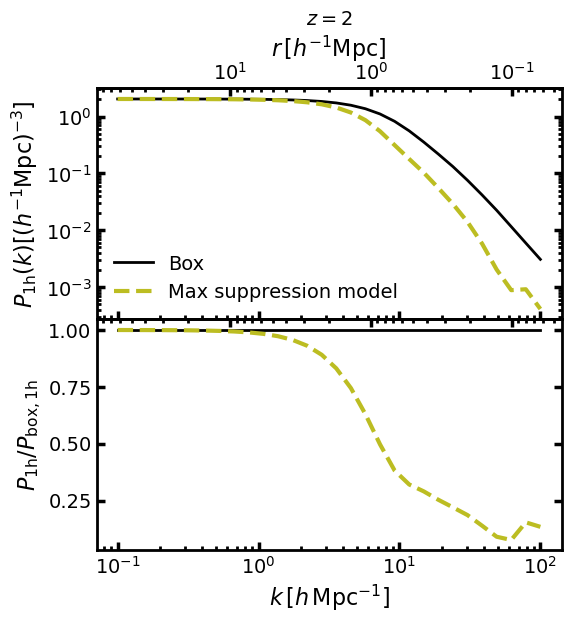

In [76]:
df = pd.read_csv(fn.HERE_PATH/'Power_Spectra'/f'pivot_z{z}_total.csv')
pivot_p_1h = np.array(df.iloc[:,0])

fg, ax = plt.subplots(2, gridspec_kw={'height_ratios':[1,1]})
fg.subplots_adjust(hspace=0)
ax[0].loglog()
ax[1].semilogx()
ax[0].set_ylabel(r'$P_\mathrm{1h}(k)[(h^{-1}\mathrm{Mpc})^{-3}]$')
ax[1].set_xlabel(r'$k\,[h\,\mathrm{Mpc}^{-1}]$')
ax[1].set_ylabel(r'$P_\mathrm{1h}/P_\mathrm{box,1h}$')
ax[0].set_title(f'$z = {z}$')

ax[0].plot(k, p_1h, lw=2, c='k', label='Box')
ax[0].plot(k, pivot_p_1h, '--', lw=3, c='tab:olive', label='Max suppression model')

ax[1].plot(k, p_1h/p_1h, lw=2, c='k')
ax[1].plot(k, pivot_p_1h/p_1h, '--', lw=3, c='tab:olive')

ax[0].set_xticklabels([])
ax[0].tick_params(which='both', top=False)
ax[1].tick_params(which='both', top=False)

f = lambda x: 2*np.pi/x

Ax = ax[0].secondary_xaxis('top', functions=(f,f))
Ax.set_xlabel(r'$r \, [h^{-1}\mathrm{Mpc}]$')

Ax2 = ax[1].secondary_xaxis('top', functions=(f,f))
Ax2.set_xticklabels([])
ax[0].legend()

fg.savefig(fn.HERE_PATH/'Power_Spectrum_Plots'/f'pivot_z{z}_total.pdf')

In [10]:
print(np.log10(x[7]))

-1.25


In [16]:
print(k[np.where((pivot_p_1h/p_1h == np.amin(pivot_p_1h/p_1h)))])

[62.10169419]


[1. 1.]
(0.9269178729312754, 1.003480101288987)
[0.92691787 1.        ]
[0.92691787 1.0034801 ]
(0.8083368758134388, 1.0091268154374553)
[0.80833688 1.0034801 ]
[0.80833688 1.00912682]


/tmp/ipykernel_308953/838529848.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 18)
/tmp/ipykernel_308953/838529848.py:24: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[i].semilogx()
/tmp/ipykernel_308953/838529848.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', 18)
/tmp/ipykernel_308953/838529848.py:24: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[i].semilogx()
/tmp/ipykernel_308953/838529848.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be 

(0.9058882216440362, 1.0511811770673924)
[0.80833688 1.05118118]
[0.80833688 1.05118118]


/tmp/ipykernel_308953/838529848.py:9: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x
/tmp/ipykernel_308953/838529848.py:9: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x


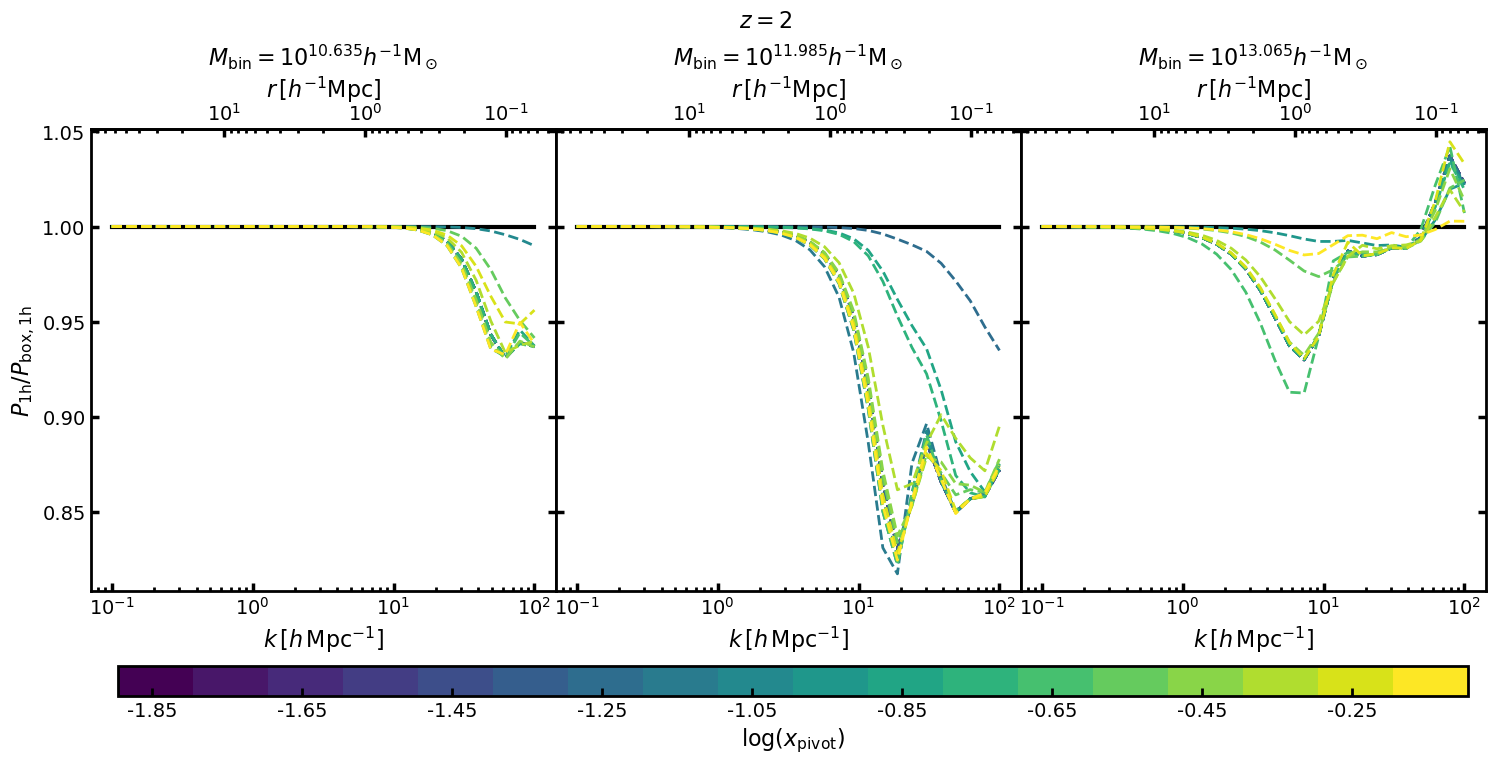

In [89]:
fg, ax = plt.subplots(1, 3, figsize=(18,6))
fg.subplots_adjust(wspace=0)
    
bins = [0, 5, 9]

ax[0].set_ylabel(r'$P_\mathrm{1h}/P_\mathrm{box,1h}$')
fg.suptitle(f'$z = {z}$', y=1.08, size=16)

f = lambda x: 2*np.pi/x
ylims = np.array([1,1], dtype=float)
print(ylims)
for i, bin_i in enumerate(bins):
    cmap = mpl.cm.get_cmap('viridis', 18)
    c=np.round(np.log10(x[1:-1]),2)
    im = ax[i].scatter(c,c,c=c,cmap=cmap)

    ax[i].cla()
        
    if i > 0:
        ax[i].set_yticklabels([])
    else:
        ax[i].set_ylabel(r'$P_\mathrm{1h}/P_\mathrm{box,1h}$')
        
    ax[i].semilogx()
    ax[i].set_xlabel(r'$k \, [h \, \mathrm{Mpc}^{-1}]$')
    ax[i].set_title(f'$M_\mathrm{{bin}} = 10^{{{round(log_m[bin_i],3)}}} h^{{-1}} \mathrm{{M}}_\odot$', size=16)
    
    ax[i].tick_params(which='both', top=False)
    Ax = ax[i].secondary_xaxis('top', functions=(f,f))
    Ax.set_xlabel(r'$r \, [h^{-1} \mathrm{Mpc}]$')
    
    ax[i].plot(k, p_1h/p_1h, lw=3, c='k', label='Box')
    
    for j, x_pivot in enumerate(x[1:-1]):
        df = pd.read_csv(fn.HERE_PATH/'Power_Spectra'/f'pivot_z{z}_b{bin_i}_x{round(np.log10(x_pivot),2)}.csv')
        P_1h = np.array(df.iloc[:,:])[:,0]
        ax[i].plot(k, P_1h/p_1h, '--', lw=2, c=cmap(j))
        
    ylim = ax[i].get_ylim()
    print(ylim)
    if ylim[0] < ylims[0]:
        ylims[0] = ylim[0]
        print(ylims)
    if ylim[1] > ylims[1]:
        ylims[1] = ylim[1]
        print(ylims)
        
print(ylims)
for i in range(3):
    ax[i].set_ylim(ylims)
    
cbar_ax = fg.add_axes([0.14, -0.065, 0.75, 0.05])
cbar = fg.colorbar(im, cax=cbar_ax, ticks=c[::2], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)
tick_locs = (c[::2]-0.0625)*17/18
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(c[::2])
cbar.ax.tick_params(width=2)

fg.savefig(fn.HERE_PATH/'Power_Spectrum_Plots'/f'pivot_z{z}.pdf', bbox_inches='tight')

In [66]:
print(ylim)
print(type(ylims))

(0.9058882216440362, 1.0511811770673924)
<class 'numpy.ndarray'>


In [65]:
print(ylims[0])

0


(32,)
(27,)
(0.1, 4.0)


/tmp/ipykernel_308953/3285746440.py:14: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x
/tmp/ipykernel_308953/3285746440.py:14: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x


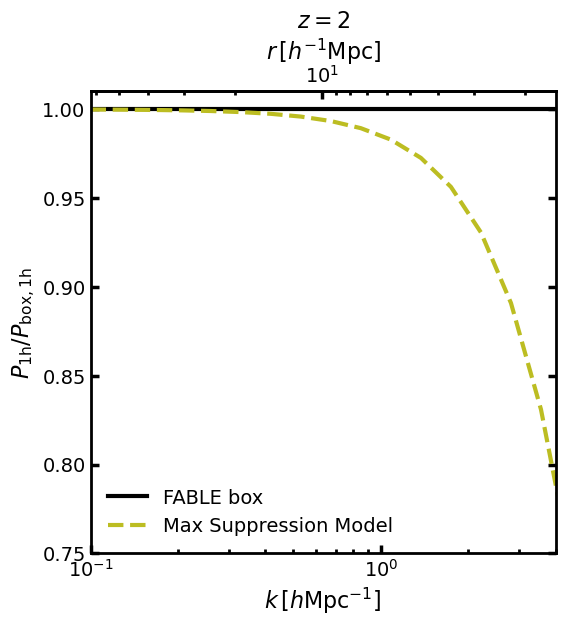

In [94]:
df_upper = pd.read_csv(fn.HERE_PATH/'Power_Spectra'/'upper_bound.csv')
k_upper = np.array(df_upper.iloc[:,0])
p_upper = np.array(df_upper.iloc[:,1])

fg2, ax2 = plt.subplots()
ax2.semilogx()
ax2.plot(k, p_1h/p_1h, 'k', lw=3, label='FABLE box')
ax2.plot(k, pivot_p_1h/p_1h, '--', lw=3, c='tab:olive', label='Max Suppression Model')
print(p_lower.shape)
print(p_upper.shape)
ax2.set_xlim(0.1, 4)
ax2.set_ylim(0.75, 1.01)
print(ax2.get_xlim())
f = lambda x: 2*np.pi/x
ax2.tick_params(which='both', top=False)
Ax = ax2.secondary_xaxis('top', functions=(f,f))
Ax.set_xlabel(r'$r \, [h^{-1} \mathrm{Mpc}]$')
ax2.set_xlabel(r'$k\,[h\mathrm{Mpc}^{-1}]$')
ax2.set_ylabel(r'$P_{\mathrm{1h}}/P_{\mathrm{box,1h}}$')
ax2.set_title(f'$z={z}$', size=16)

ax2.legend()

fg2.savefig(fn.HERE_PATH/'Power_Spectrum_Plots'/f'Pivot_Total_z{0}.pdf', bbox_inches='tight')